In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [21]:
df_tweets = pd.read_csv('training.1600000.processed.noemoticon.csv',header=None,names= ['target','ids','Date','flag','user','text'])
df_tweets.head() 
#df.info()
#df.describe()

,target,ids,Date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [24]:
import re
def cleaned_text(text):
    # eliminating urls
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    # eliminating mentions
    text = re.sub('@[^\s]+',' ', text)
    # eliminating 
    text = re.sub('[\s]+', ' ', text)
    # eliminating hashtags
    text = re.sub(r'#([^\s]+)', r' ', text)
    return text
df_tweets['tidy_tweet'] = df_tweets.text.apply(cleaned_text)
df_tweets.head()

,target,ids,Date,flag,user,text,tidy_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- Awww, that's a bummer. You shoulda got Davi..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [25]:
df_tweets = df_tweets.drop(columns = ['ids','Date','flag','user'])

In [27]:
# removing Punctuations
from nltk.corpus import stopwords
StopWords = set(stopwords.words('english'))
def text_cleaner(text):
    text = text.str.replace('[^a-zA-Z#]',' ')
    text = text.str.lower()
    text = text.apply(lambda x: ' '.join(w for w in x.split() if w not in StopWords))
    return text
df_tweets['tidy_tweet'] = text_cleaner(df_tweets['tidy_tweet'])
df_tweets.head()

<ipython-input-27-bf92f9f78e63>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('[^a-zA-Z#]',' ')


,target,text,tidy_tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad see


In [28]:
# tokenizing of tweets
tokenized_tweet = df_tweets['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [awww, bummer, shoulda, got, david, carr, thir...
1    [upset, update, facebook, texting, might, cry,...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4                                 [behaving, mad, see]
Name: tidy_tweet, dtype: object

In [29]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [awww, bummer, shoulda, got, david, carr, thir...
1    [upset, updat, facebook, text, might, cri, res...
2    [dive, mani, time, ball, manag, save, rest, go...
3               [whole, bodi, feel, itchi, like, fire]
4                                    [behav, mad, see]
Name: tidy_tweet, dtype: object

In [30]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df_tweets['tidy_tweet'] = tokenized_tweet

In [31]:
df.head()

,neg,neu,pos,compound,tweet,label
0,0.0,1.0,0.0,0.0,id,0
1,0.0,1.0,0.0,0.0,idx,0
2,0.0,1.0,0.0,0.0,datetime,0
3,0.0,0.0,0.0,0.0,q,0
4,0.0,1.0,0.0,0.0,username,0


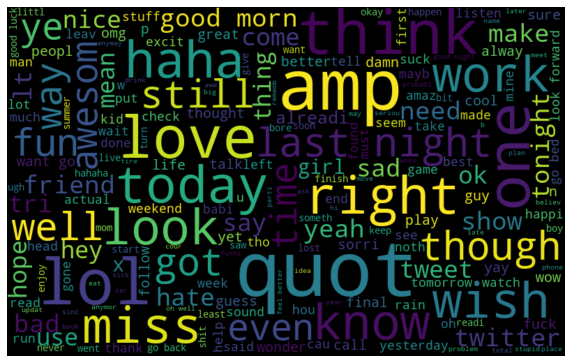

In [32]:
# tweets in general
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df_tweets['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

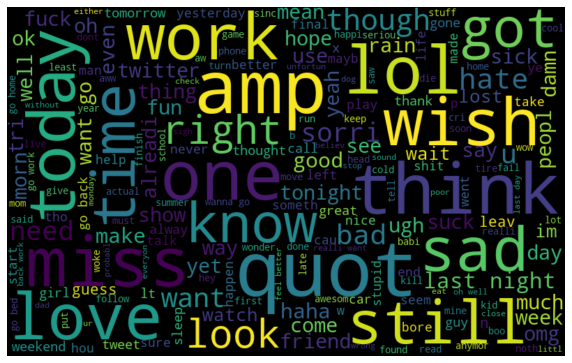

In [34]:
# nagative tweets
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df_tweets['tidy_tweet'][df_tweets['target'] == 0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

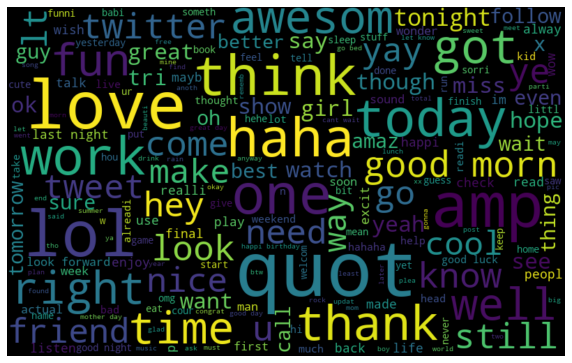

In [36]:
# positive tweets
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df_tweets['tidy_tweet'][df_tweets['target'] == 4]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

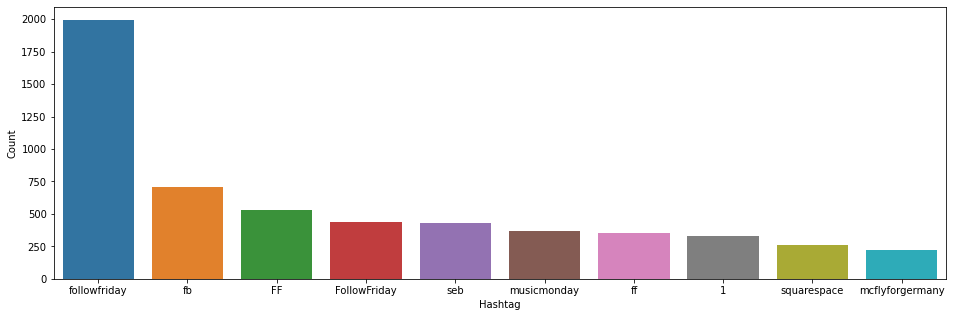

In [38]:
HT_negative = hashtag_extract(df_tweets['text'][df_tweets['target'] == 0])
HT_regular = hashtag_extract(df_tweets['text'][df_tweets['target'] == 4])
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

import nltk
import seaborn as sns
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

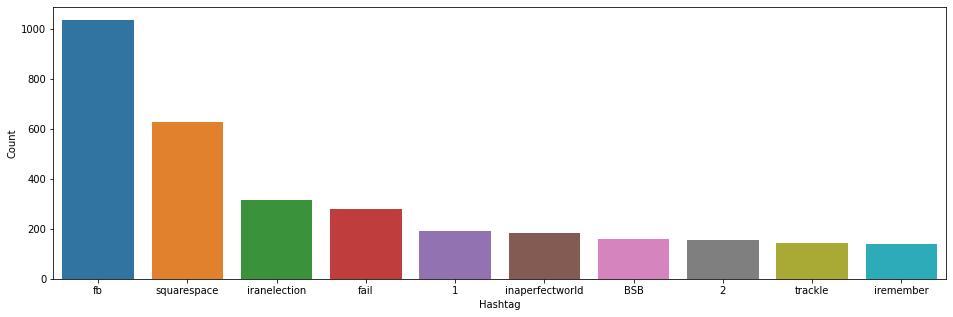

In [39]:
import nltk
import seaborn as sns
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
BOW_CV= CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = BOW_CV.fit_transform(df_tweets['tidy_tweet'])

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, df_tweets['target'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int,average='micro') # calculating f1 score
class_report = classification_report(yvalid, prediction_int)

<ipython-input-41-66957edbf976>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)
c:\users\tro\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\tro\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWar

In [42]:
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.46      0.60    239361
           1       0.00      0.00      0.00         0
           4       0.00      0.00      0.00    240639

    accuracy                           0.23    480000
   macro avg       0.29      0.15      0.20    480000
weighted avg       0.43      0.23      0.30    480000

